# Estudo Dirigido


Os ítens do enunciado serão analisados e respondidos previamente neste notebook. O relatório final contendo os resultados destas analises encontra-se no diretório `report`. Os gráficos gerados aqui são mantidos no diretório `report/images`.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ondas-no-Tokamak-TCABR" data-toc-modified-id="Ondas-no-Tokamak-TCABR-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ondas no Tokamak TCABR</a></span><ul class="toc-item"><li><span><a href="#Resolução-Temporal-(frequência-de-aquisição)" data-toc-modified-id="Resolução-Temporal-(frequência-de-aquisição)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Resolução Temporal (frequência de aquisição)</a></span></li><li><span><a href="#Representação-gráfica-das-séries-temporais-referentes-a-cada-sonda" data-toc-modified-id="Representação-gráfica-das-séries-temporais-referentes-a-cada-sonda-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Representação gráfica das séries temporais referentes a cada sonda</a></span></li><li><span><a href="#Valores-Médios-do-Fluxo-Magnético" data-toc-modified-id="Valores-Médios-do-Fluxo-Magnético-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Valores Médios do Fluxo Magnético</a></span></li></ul></li></ul></div>

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%run get_data.py

data_path = "data/"

dtypes = dict(
    time=float,
    probe_1=float,
    probe_2=float
)

helimak = pd.read_csv(data_path + "HELIMAK.csv", dtype=dtypes)

## Ondas no Tokamak TCABR


In [31]:
# Load data from csv file
tcabr = pd.read_csv(data_path + "TCABR.csv", dtype=dtypes)

# Set TCABR parameters
r = 0.195


### Resolução Temporal (frequência de aquisição)

- Corresponde ao número de acquisições por unidade de tempo (segundos)

In [18]:
frequency = tcabr['time'].count() / (tcabr['time'].max() * 0.001)

print(frequency)

250000.0


por tanto, a resolução temporal das sondas é de 250kHz.

### Representação gráfica das séries temporais referentes a cada sonda

- Janela de tempo de 1ms utilizada, entre t=3.0s e t=4.0s

<Figure size 864x360 with 0 Axes>

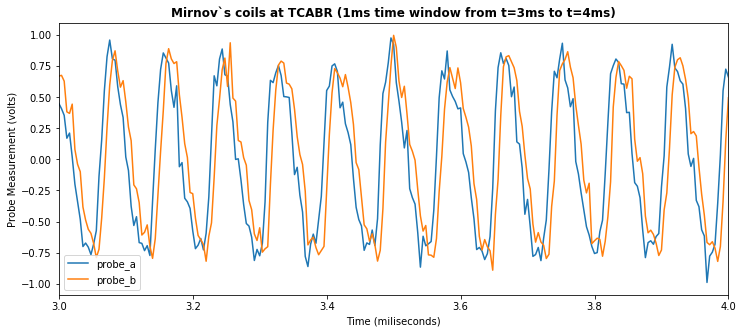

In [45]:
plt.rcParams["figure.figsize"] = (12,5)

fig = plt.figure()
tcabr[(tcabr['time'] >= 3) & (tcabr['time'] <= 4)].plot.line(x='time', y=['probe_a', 'probe_b'])
plt.ylabel("Probe Measurement (volts)")
plt.xlabel("Time (miliseconds)")
plt.title("Mirnov`s coils at TCABR (1ms time window from t=3ms to t=4ms)", fontweight='bold')
plt.savefig('report/images/tcabr_probes_a_b_time_series_1ms.png', bbox_inches='tight')


### Valores Médios do Fluxo Magnético

Cálculo dos valores médios do fluxo magnético medido nas bobinas, juntamente do desvio quadrático médio. 